# Problem Set 3 - Zane Bayer - CSCI520 - 4/12/2022

note: Colab seems to have changed in some way in how it inserts the collapsible sections for headings. If you are using google colab while grading, you can still navigate to each question using the table of contents on the left.

## Learning from Data 

#### EX. 3.2

#### We need to make only 3 updates to the PLA exercise from a previous problem set to satisfy this exercise:
#### 1. Create Nonlinear (NL) dataset
#### 2. Evaluate $E_{in}$ at each step in PLA
#### 3. Store the best performing weight vector



#### the following block implements the pocket PLA by adding updates 2 and 3 described above.

In [87]:
import numpy as np
from numpy import random as rd
import matplotlib.pyplot as plt


def plaPocket(ds, maxIter):
    
    #function which performs the pocket perceptrn learning algorithm
    #on a dataset ds.
    #INPUTS:
    #1.ds: The dataset which have the form [x1 x2 label] for each sample
    #2.maxIter: the maximum number of iterations the algorithm should execute
    #OUTPUTS:
    #1. w: the final weight vector found through usual pla
    #2. wBest: the best performing weight vector found in all iterations
    #3. updateAcc: list of accuracy values for the updated weight vector at each iteration
    #4. bestAcc: list of accuracy values for the best performing weight vector at each each iteration

    #Appending x0=1
    ds=np.insert(ds,0,np.ones([len(ds)]),axis=1)
    numSample=ds.shape[0]
    numDim=ds.shape[1]-1
    
    #initializing 
    w = np.zeros(numDim)
    wBest=np.zeros(numDim)
    x= ds[:,:numDim]
    labels=ds[:,numDim]
    updateAcc=[]
    bestAcc=[]
    
    #Main loop 
    for i in range(maxIter):
        updatePosLabel=[]
        bestPosLabel=[]
        ind = rd.choice(np.arange(numSample), numSample)
        
        for j in range(len(ind)):
            pt=x[j]
            label=y[j]
            prod=pt.dot(w.T)
            pred = prod*label             
            
            if pred <= 0:
                w = w + (label-prod)*pt
                w=w/w[-1]
                 
            else:
                updatePosLabel.append(j)

            prod=pt.dot(wBest.T)
            pred=prod*label
            if pred>0:
              bestPosLabel.append(j)

        updateCorrect=len(updatePosLabel)/numSample
        bestCorrect=len(bestPosLabel)/numSample

        if updateCorrect>bestCorrect:
          wBest=w
            
        updateAcc.append(updateCorrect)
        bestAcc.append(bestCorrect)

        if len(updatePosLabel) == numSample:
            break
        

    '''
    if len(posLabel)!=numSample:
      print('PLA did not converge completely, accuracy=',len(posLabel)/numSample)
    else:
      print('PLA converged after',i,'iterations')
    '''
    return w, wBest, updateAcc, bestAcc

#### Creating a NL dataset by the method described in the text of creating a linear set, then randomly changing the labels of 10% of the points. 

[-0.07498551  0.41271931]


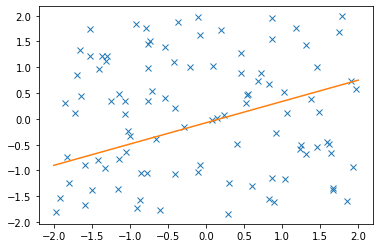

In [88]:
numPts=100

coef=rd.uniform(-1,1,[2])
print(coef)
poly=np.polynomial.Polynomial(coef.T)
plt.figure()
x=rd.uniform(-2,2,[numPts,2])
plt.plot(x[:,0],x[:,1],'x')

x1=np.linspace(-2,2,1000)
plt.plot(x1,poly(x1))

plt.show()

In [89]:
#Using an rng, the below will randomly mislabel a pt. with probability of 10%

y=np.zeros(len(x))
plus=[]
minus=[]

for i in range(x.shape[0]):
  val=poly(x[i][0])
  prob=rd.rand()

  if np.sign(val-x[i][1])<0 and prob<.9:
    y[i]=int(1)
    plus.append(x[i])
  elif prob<.9:
    y[i]=int(-1)
    minus.append(x[i])

  if np.sign(val-x[i][1])<0 and prob>=.9:
    y[i]=int(-1)
    minus.append(x[i])
  elif prob>=.9:
    y[i]=int(1)
    plus.append(x[i])
plus=np.asfarray(plus)
minus=np.asfarray(minus)

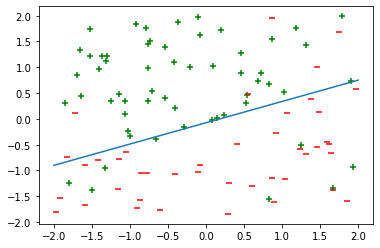

In [90]:
#By plotting, we can see that the cell above is working well at mislabeling ~10% of the data
plt.figure()

plt.scatter(plus[:,0],plus[:,1],c='g',marker='+')
plt.scatter(minus[:,0],minus[:,1],c='r',marker='_')
x1=np.linspace(-2,2,100)
plt.plot(x1,poly(x1))

#### compiling the dataset and running the experiment as asked in the text.

In [91]:
ds=np.append(x,y.reshape(len(y),1),axis=1)

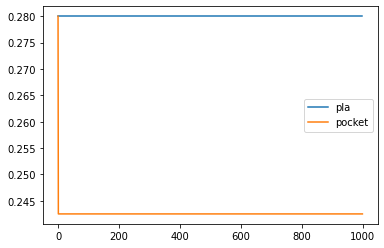

In [92]:
maxIters=1000
maxTrials=20

avgUpdateAcc=np.zeros(maxIters)
avgBestAcc=np.zeros(maxIters)

for i in range(maxTrials):
  updateCoeff,bestCoeff,updateAcc,bestAcc=plaPocket(ds,maxIters)
  avgUpdateAcc=avgUpdateAcc+updateAcc
  avgBestAcc=avgUpdateAcc+bestAcc

#calculating the average error in for the two methods
errorUpdate=1-avgUpdateAcc/maxTrials
errorBest=1-avgBestAcc/maxTrials
#print(max(avgBestAcc/maxTrials))
#plotting the average error in sample for the two methods on the dataset
plt.plot(errorUpdate,label='pla')
plt.plot(errorBest,label='pocket')
plt.legend()

#### from the above plot, it's clear that the pocket algorithm has a lower average error rate than the normal pla. I am confused about the last part of the question which asks to use a test set of N=1000, then plot $E_{out}(\vec{w}(t))$ and $E_{out}(\hat{w})$. I dont understand how the two out of sample error values would depend on t as we are not updating w and calculating the error at each step like we are in testing. The below is incomplete, it only creates the data for the last part.

In [93]:
maxTrials=20
numPts=1000

for i in range(maxTrials):
  coef=rd.uniform(-1,1,[2])
  poly=np.polynomial.Polynomial(coef.T)
  x=rd.uniform(-2,2,[numPts,2])

  y=np.zeros(len(x))
  plus=[]
  minus=[]

  for j in range(x.shape[0]):
    val=poly(x[j][0])
    prob=rd.rand()

    if np.sign(val-x[j][1])<0 and prob<.9:
      y[j]=int(1)
      plus.append(x[j])
    elif prob<.9:
      y[j]=int(-1)
      minus.append(x[j])

    if np.sign(val-x[j][1])<0 and prob>=.9:
      y[j]=int(-1)
      minus.append(x[j])
    elif prob>=.9:
      y[j]=int(1)
      plus.append(x[j])
  plus=np.asfarray(plus)
  minus=np.asfarray(minus)
  ds=np.append(x,y.reshape(len(y),1),axis=1)


  

### EX.4.3 
### a. Assuming that $f$ becomes more complex than the fixed $H$, then the deterministic noise will increase since its a property of the target function $f$. Since the amount of noise is increasing , there will be a higher tendency to overfit.

### b. Neither, the deterministic noise is a property of $f$ alone, thus varying the complexity will have no effect on the amount of deterministic noise present in the data. When $H$ is less complex than $f$, there will be less tendency to overfit the data since we have less free parameters in $H$.



### EX. 4.9



### As the validation set size, K, increases the model has less data to train on. For small values of K, this has a minimal effect on the expected error. However, as K grows larger it starts having a sigficant impact on the model's performance since the model does not have a enough data to converge during training. As for the second question of why the two curves converge as K increases, look at the relation between $E_{out}$ and $E_{val}$ given by
#### <center> $E_{out}(g) \le E_{val}(g)+O(\frac{1}{\sqrt{K}})$

#### As the validation set size K increases, the $O(\frac{1}{\sqrt{K}})$ approach zero. As such, we would expect $E_{out}$ and $E_{val}$ to converge with one another as we see in the plot. 

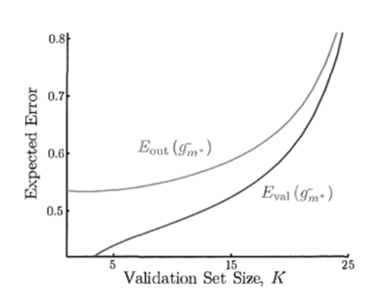


## Pattern Recognition and Machine Learning 

### 1.2

### The regularized sum of squares error function is given by eq. 1.4,
### <center> $\tilde{E}(\vec{w})=\frac{1}{2}\sum_{n=1}^{N} \{y(x_n,\vec{w})-t_n\}^2+\frac{\lambda}{2}||\vec{w}||^2$
### where $||\vec{w}||=\vec{w}^T\vec{w}$
### taking the deriviative with respect to the weights gives
### <center> $\frac{∂\tilde{E}}{∂w_i}=\frac{∂}{∂w_i}[\frac{1}{2}\sum_{n=1}^{N} \{y(x_n,\vec{w})-t_n\}^2+\frac{\lambda}{2}||\vec{w}||^2]$
### <center> $=\frac{1}{2}[2\sum_{n=1}^{N} \{y(x_n,\vec{w})-t_n\}x_n^i+2\lambda w_i]$

### <center> $=\sum_{n=1}^{N}\sum_{j=0}^{M}x_n^{j+i}w_j-\sum_{n=1}^{N}x_n^it_n+\lambda w_i$

### The error is optimized when $\frac{∂\tilde{E}}{∂w_i}=0$, so 
###  <center> $\sum_{n=1}^{N}\sum_{j=0}^{M}x_n^{j+i}w_j-\sum_{n=1}^{N}x_n^it_n+\lambda w_i=0$

### <center> $\sum_{n=1}^{N}\sum_{j=0}^{M}x_n^{j+i}w_j+\lambda w_i=\sum_{n=1}^{N}x_n^it_n$

### Allow $A_{ij}=\sum_{n=1}^N (x_n)^{j+i}$ and $T_i=\sum_{n=1}^N (x_n)^it_n$, then 
### <center> $\sum_{j=0}^M A_{ij}w_j+\lambda w_j=T_i$

### We've derived a set of equations which are almost identical to those in problem 1.1 which minimized the nonregularized sum of squares error (eq. 1.122),
### <center> $\sum_{j=0}^M A_{ij}w_j=T_i$
### but now we have an additional regularization term, $\lambda w_j$, in each equation.




### 1.3

### The contents of the boxes are:


*   red: 3 apples, 4 oranges, 3 limes
*   blue: 1 apple, 1 orange, 0 limes
*   green: 3 apples, 3 oranges, 4 limes

### Let the probabilities for each be: $p(r)=.2$, $p(b)=.2$, and $p(g)=.6$. The probability of selecting an apple is given by the sum 
### <center> $p(a)=p(r)p(a|r)+p(b)p(a|b)+p(g)p(a|g)$
### <center> $=(.2)(.3)+(.2)(.5)+(.6)(.3)$
### <center> $.06+.1+.18=.34$
### So the probability of selecting an apple is 34%. We can use Baye's theorem (eq.1.43),
### <center> $p(\vec{w}|D)=\frac{p(D|\vec{w})p(\vec{w})}{p(D)}$
### to find the probability that a selected orange came from the green box by
### <center>  $p(g|0)=\frac{p(o|g)p(g)}{p(o)}$
### to get p(o), we have to do the same type of sum as we did for the probability of selectig an apple.
### <center> $p(o)=p(r)p(o|r)+p(b)p(o|b)+p(g)p(o|g)$
### <center> $=(.2)(.4)+(.2)(.5)+(.6)(.3)$
### <center> $.08+.1+.18=.36$
### Plugging into Baye's theorem gives 
### <center> p(g|o)=$\frac{(.3)(.6)}{.36}=.5$
### So the probability that the picked orange came from the green box is 50%.

### 1.39

### Table 1.3 is shown below.
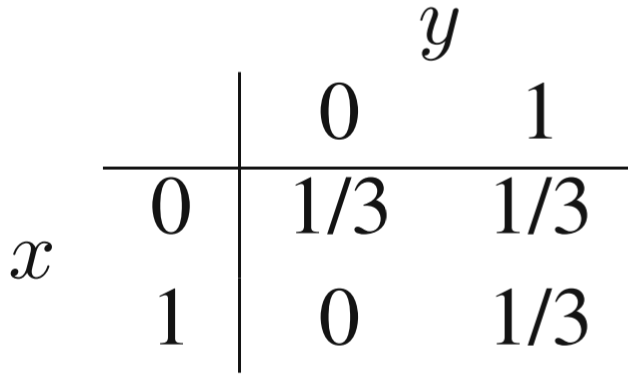

### the entropy H is given by eq 1.97,
### <center> $H=-∑_i p_iln(p_i)$

###a. $H[x]=-\sum_i p(x)ln(p(x))=-[\frac{2}{3}ln\frac{2}{3}+\frac{1}{3}ln\frac{1}{3}]=.63651$

###b. $H[y]=-\sum_i p(y)ln(p(y))=-[\frac{1}{3}ln\frac{1}{3}+\frac{2}{3}ln\frac{2}{3}]=.63651$

### The entropy for conditionals is given by 
### <center> $H[Y|X]=-\sum_i \sum_j p(x,y)log(\frac{p(x,y)}{p(x)}$

### c. $H[y|x]=-[\frac{1}{3}ln\frac{1}{2}+\frac{1}{3}ln\frac{1}{2}+\frac{1}{3}ln1]=.46210$

### d. $H[x|y]=-[\frac{1}{3}ln1+\frac{1}{3}ln\frac{1}{2}+\frac{1}{3}ln\frac{1}{2}]=.46210$

### e. $H[x,y]=H[y|x]+H[x]=.46210+.63651=1.0986$
### f. $I[x,y]=H[x]-H[x|y]=.63651-.46210=.17441$

### 2.12 
We're told that the uniform distribution for a random variable x is
### <center> $U(x|a,b)=\frac{1}{b-a}$ for $a≤x\le b$
### It's easy to show that this distribution is normalized over the domain  $a≤x\le b$,
### <center> $∫_a^b\frac{1}{b-a}dx=[\frac{x}{b-a}]_a^b =\frac{b}{b-a}-\frac{a}{b-a}=1$
</br>

### The mean of this distribution is found by calculating $\mathbb{E}[x]$,
### <center> $\mathbb{E}(x)=∫_a^b \frac{x}{b-a}dx=[\frac{1}{2}\frac{x^2}{b-a}]_a^b=\frac{1}{2}[\frac{b^2}{b-a}-\frac{a^2}{b-a}]=\frac{1}{2}\frac{(b+a)(b-a)}{b-a}=\frac{b+a}{2}$

### Thus the mean of the uniform distribution is $\frac{b+a}{2}$. The variance is given by 
### <center> $var[x]=\mathbb{E}[x^2]-\mathbb{E}[x]^2$
### We already know the mean value, so
### <center> $var[x]=\mathbb{E}[x^2]-(\frac{a+b}{2})^2$
### The quantity $\mathbb{E}[x^2]$ is given by
### <center> $\mathbb{E}[x^2]=∫_a^b \frac{x^2}{b-a}dx=[\frac{1}{3}\frac{x^3}{b-a}]_a^b$
### <center> $=\frac{1}{3}[\frac{b^3-a^3}{b-a}]=\frac{1}{3}[b^2+ba+a^2]$
### So the variance is given by
### <center> $var[x]=\frac{1}{3}[b^2+ba+a^2]-(\frac{a+b}{2})^2$
### <center> $\frac{1}{3}[b^2+ba+a^2]-\frac{1}{4}[a^2+ba+b^2$

### <center> $⇒12var[x]=4b^2+4ba+4a^2-(3a^2+3ba+3b^2)=b^2+ba+a^2=(a+b)^2$
### <center> $⇒var[x]=\frac{(a+b)^2}{12}$

### 3.4

### We are given the linear model 
### <center> $y(x,\vec{w})=w_0+\sum_{i=1}^{D}w_ix_i$
###and the sum of squares error function in the form
### <center> $E_d(\vec{w})=\frac{1}{2}\sum_{n=1}^{N}\{y(x_n,\vec{w})-t_n\}^2$
### We are told that a Gaussian noise $ϵ_i$ is with mean of zero ($\mathbb{E}[ϵ_i]=0)$ and variance $\sigma^2$ ($\mathbb{E}[ϵ_i ϵ_j]=δ_{ij} σ^2$) is added to each of the input variables $x_i$. Allow $\tilde{y}$ to be the modified linear model 
### <center> $\tilde{y}=w_0+\sum_{i=1}^{D}w_i(x_{ni}+\epsilon_{ni})=y_n+\sum_{i=1}^{D}w_iϵ_{ni}$

### where $y_n=y(y(x_n,\vec{w})$ and $\epsilon_{ni} \tilde{} N(0,\sigma^2)$. The modified error function is then 
### <center> $\tilde{E}=\frac{1}{2}\sum_{n=1}^N \{\tilde{y}-t_n\}^2$ 
### <center> $=\frac{1}{2}\sum_{n=1}^N \{\tilde{y}^2-2\tilde{y}t_n+t_n^2\}$
### <center> $=\frac{1}{2}\sum_{n=1}^N \{y_n^2+2y_n\sum_{i=1}^D w_iϵ_{ni}+(\sum_{i=1}^D w_iϵ_{ni})^2-2t_ny_n-2t_n\sum_{i=1}^D w_iϵ_{ni}+t_n^2\}$
### We now take the expectation of $\tilde{E}$ over $ϵ_{ni}$
### <center> $\mathbb{E}[\tilde{E}]=\mathbb{E}[\frac{1}{2}\sum_{n=1}^N \{y_n^2+2y_n\sum_{i=1}^D w_iϵ_{ni}+(\sum_{i=1}^D w_iϵ_{ni})^2-2t_ny_n-2t_n\sum_{i=1}^D w_iϵ_{ni}+t_n^2\}]$ 
### since $\mathbb{E}[ϵ_{ni}]=0$, the second and fifth terms are zero, so
### <center> $\mathbb{E}[\frac{1}{2}\sum_{n=1}^N \{y_n^2+(\sum_{i=1}^D w_iϵ_{ni})^2-2t_ny_n+t_n^2\}]$
### <center> $=\mathbb{E}[E_D+(\sum_{i=1}^D w_iϵ_{ni})^2]$
### $E_D$ is independent of ϵ_{ni}, so
### <center> $=E_D+\mathbb{E}[(\sum_{i=1}^D w_iϵ_{ni})^2]$
### Each $ϵ_{ni}$ are independent with variance $\sigma^2$, so we get the final result
### <center> $\mathbb{E}[\tilde{E}]=E_D+\frac{1}{2}\sum_{i=1}^D w_i^2\sigma^2$

### 3.11

### We are given the ,matrix identity
### <center> $M+\vec{v}\vec{v}^T=M^{-1}-\frac{(M^{-1}\vec{v})(\vec{v}^TM^{-1})}{1+\vec{v}^TM^{-1}\vec{v}}$

### and eq. 3.59 for the uncertainity of the linear regression function 
### <center> $\sigma_{N}^2(\vec{x})=\frac{1}{β}+\phi(\vec{x})^TS_N\phi(\vec{x})$
### It follows that the uncertainty at step N+1 is given by 
### <center>  $\sigma_{N+1}^2(\vec{x})=\frac{1}{β}+\phi(\vec{x})^TS_{N+1}\phi(\vec{x})$
### Problem 3.8 tells us that $S_{N+1}$ is 
### <center> $S_{N+1}^{-1}=S_N^-1+β\phi_{N+1}\phi_{N+1}^T⇒S_{N+1}=[S_N^-1+β\phi_{N+1}\phi_{N+1}^T]^{-1}$
### plugging this into the uncertainty eq. gives
### <center>  $\sigma_{N+1}^2(\vec{x})=\frac{1}{β}+\phi^T[S_N^-1+β\phi_{N+1}\phi_{N+1}^T]^{-1}\phi$

### Using the given matrix identity (eq 3.110) yields
###  <center>  $\sigma_{N+1}^2(\vec{x})=\frac{1}{β}+\phi^T[S_N-β\frac{(S_N\phi_{N+1})(\phi_{N+1}^TS_n)}{1+\beta\phi_{N+1}^TS_N\phi_{N+1}}]\phi$
### Now consider the quantity $\sigma_N^2(\vec{x})-\sigma_{N+1}^2(\vec{x})$,
### <center> $\sigma_N^2(\vec{x})-\sigma_{N+1}^2(\vec{x})=\frac{1}{β}+\phi(\vec{x})^TS_N\phi(\vec{x})-\{\frac{1}{β}+\phi^T[S_N-β\frac{(S_N\phi_{N+1})(\phi_{N+1}^TS_n)}{1+\beta\phi_{N+1}^TS_N\phi_{N+1}}]\phi\}$
### <center> $=\phi^T[β\frac{(S_N\phi_{N+1})(\phi_{N+1}^TS_n)}{1+\beta\phi_{N+1}^TS_N\phi_{N+1}}]\phi$
### <center> $=β\frac{(\phi^TS_N\phi_{N+1})(\phi_{N+1}^TS_n\phi)}{1+\beta\phi_{N+1}^TS_N\phi_{N+1}}$
### <center> $=β\frac{[\phi^TS_N\phi_{N+1}]^2}{1+\beta\phi_{N+1}^TS_N\phi_{N+1}}$
### Hint #2 tells us that $S_N$ is positive definite, meaning
### <center> $\phi^TS_N\phi_{N+1}> 0$ 
### for all $\phi\in \mathbb{R}^n$ excluding the zero vector. So both the numerator and denominator will always be positive and it follows that 
### <center> $β\frac{[\phi^TS_N\phi_{N+1}]^2}{1+\beta\phi_{N+1}^TS_N\phi_{N+1}}\ge0$
### We conclude that 
### <center> $\sigma_N^2(\vec{x})-\sigma_{N+1}^2(\vec{x})\ge0⇒\sigma_N^2(\vec{x})\ge \sigma_{N+1}^2(\vec{x})$